# What is a regression problem?

> `How much` will this house sell for?

> `How many` people will buy this app?

> `How much` will my health insurance be?

### 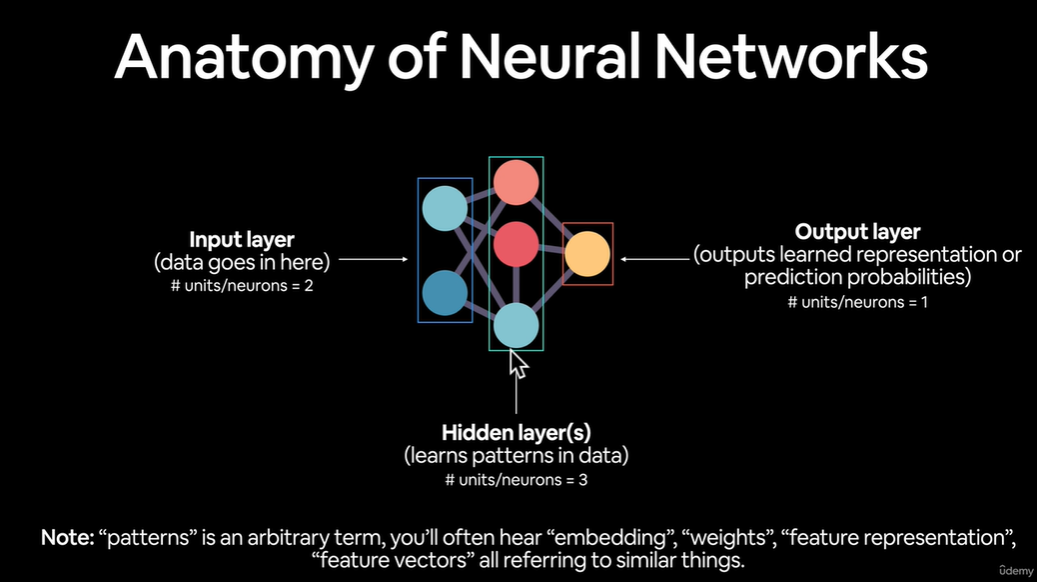Predicting a number of some sort of number

> Can also be predicting the `Coordinates` of the boxes in object detection problem






## What we are going to cover
* Architecture of a neural network regression model
* Input shapes and output shapes of a regression model(features and labels)
* Creating custom data to view and fit
* Steps in modeling
* Creating a model, compiling a model, fitting a model, evaluating a model
* Different evaluation methods
* Saving and loading the model

### What are the inputs and outputs of the neural network regression model?

let us consider a house price predition problem
* inputs can be - #bedrooms, #bathroms, #garages in numerical encoded form.
  * This are often called `Input Features`. (features, independent variables)
* output can be - Might be price of this house.

### So what might be the shape of inputs and outputs

* inputs - [3]
* output - [1]

According to the previous problem.

# Introduction to Regression with neural networks in Tensorflow

There are many definitions for a regression problem but in our case, we're going to simplify it: precting a numerical variable based on some other combinations of variables, even shorter.. predicting a number.

In [1]:
import tensorflow as tf
print(tf.__version__)

2.15.0


## Creating some data to view and fit

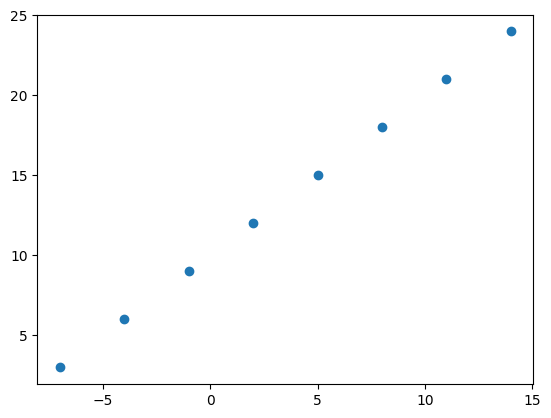

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
#create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0,21.0, 24.0])

#visualize
plt.scatter(X,y);

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [4]:
X.shape, y.shape

((8,), (8,))

In [5]:
# Create a demo tensor for our housing price prediction problem based on our previous problem
house_info = tf.constant(["bedroom", 'bathroom', 'garage'])
house_price = tf.constant([938900])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([938900], dtype=int32)>)

In [6]:
house_info.shape, house_price.shape

(TensorShape([3]), TensorShape([1]))

In [7]:
# Turn our numpy arrays into tensors

X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [8]:
X.shape, y.shape

(TensorShape([8]), TensorShape([8]))

## Steps in modelling with tensorflow

1. Creating a model - define the inputs and output layer, as well as hidden layer of a deep learing model.
2. Compiling a model - define the loss function (in other words, the function which tell our model how wrong it is) and optimizer and evaluation metrics(we can use to interpret the perform of the model)
3. fitting the model - letting the model to find pattern between X & y (features and labels)

In [9]:
# set random seed
tf.random.set_seed(42)

# 1. Create a model usinng Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

# 3. fit the model

model.fit(tf.expand_dims(X, axis  = -1), y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 0s 468ms/step - loss: 7.7967 - mae: 7.7967
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 7.6642 - mae: 7.6642
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 7.5317 - mae: 7.5317
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 7.4775 - mae: 7.4775
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 7.4719 - mae: 7.4719


## Improve our model

We can improve our model, by altering the steps we took to create a model.

- **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.

- **Compiling a model** - here we might change the optimization funtion or perhaps the **learning rate** of the optimization function.

- **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more example to learm from)

In [10]:
# lets code a large model
tf.random.set_seed(42)
large_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

large_model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
    metrics = ['mae', 'mse']
)

large_model.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 936ms/step - loss: 12.9179 - mae: 12.9179 - mse: 212.3102
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 9.4281 - mae: 9.4281 - mse: 106.7185
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 5.1636 - mae: 5.1636 - mse: 33.3206
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 6.5909 - mae: 6.5909 - mse: 66.8531
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 7.7628 - mae: 7.7628 - mse: 97.9725
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 5.8828 - mae: 5.8828 - mse: 52.1366
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 4.0051 - mae: 4.0051 - mse: 22.5346
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 4.2517 - mae: 4.2517 - mse: 25.8077
Epoch 9/100
1/1 [==============================] - 0s 15ms/step - loss: 4.7853 - mae: 4.7853 - mse: 29.3083
Epoch 10/100
1/1 [=====

In [11]:
model.predict(X), y.numpy()

1/1 [==============================] - 0s 140ms/step


(array([[-12.096606 ],
        [ -6.8930607],
        [ -1.6895152],
        [  3.5140305],
        [  8.717576 ],
        [ 13.921122 ],
        [ 19.124666 ],
        [ 24.328213 ]], dtype=float32),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

## Evaluting a model

in practice, a typical workflow you'll go through whenn building neural network is:

```
Build a model -> fit it -> evluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it ...
```

When it comes to evaluateion.. there are 3 words you should memories

> "Visualize, Visualize, Visualize"

it's a good idea to visualize:
* The data- what data are we working with? What does it look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth the original labels

In [12]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [13]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

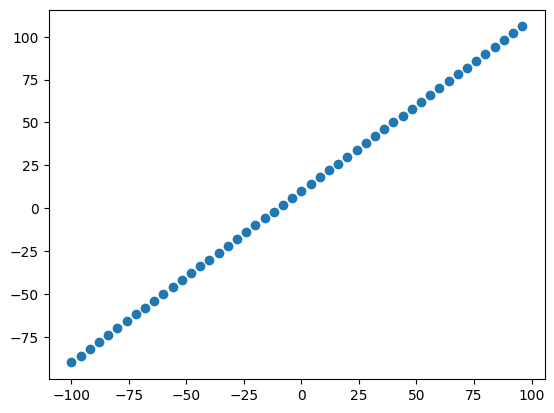

In [14]:
import matplotlib.pyplot as plt
plt.scatter(X,y);

### The 3 sets..
Training, testing and validation set

* Training set - the model learns from this data, which is typically 70- 80% of the total data you have available.
* Validation set - the model get tuned on this data, which is typically 10-15% of the data avialable
* Test set- the model evaluated on this dat to test whaat is has leraned, this set is typically 10-15% of the total data available.

In [15]:
# Check the lenght of how many samples we have
len(X)

50

In [16]:
# split the data into train and test sets
X_train = X[:40] # first 40 training sampless that is 80% of the data
X_test = X[40:]

y_train = y[:40]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and test set.. let's visualize it again

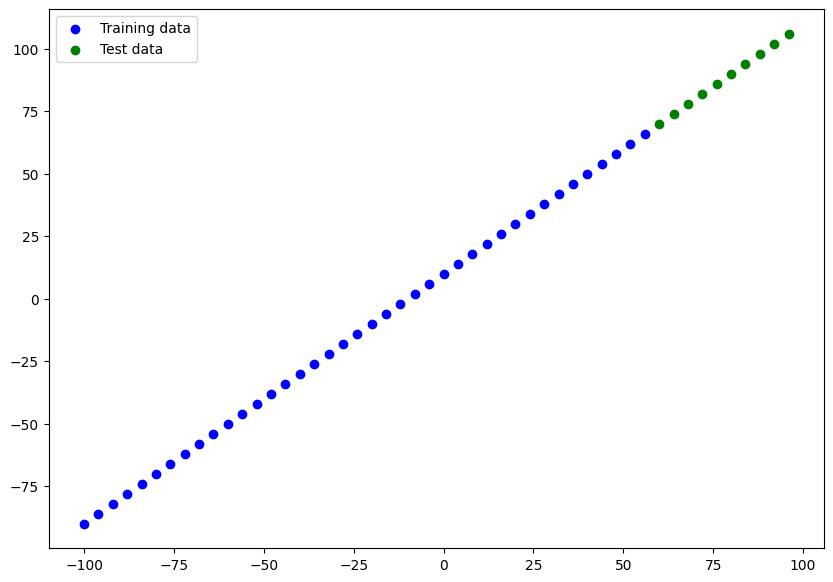

In [17]:
plt.figure(figsize= (10, 7))
#plot training data in blue
plt.scatter(X_train, y_train, c='b', label = "Training data")
#plot test data in green
plt.scatter(X_test, y_test, c= 'g', label = "Test data")
#show the legend
plt.legend();

In [18]:
# Let's have a look at how to build a neural network
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import mae
from tensorflow.keras.optimizers import Adam, SGD

# Create a model
model = Sequential([
    Dense(1)
])
# compile the model
model.compile(loss = mae,
              optimizer = SGD(),
              metrics = [
                  'mae'
              ])

# fit the model
model.fit(tf.expand_dims(X_train,axis = -1) , y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 1s 12ms/step - loss: 65.6814 - mae: 65.6814
Epoch 2/100
2/2 [==============================] - 0s 12ms/step - loss: 30.5884 - mae: 30.5884
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 10.1939 - mae: 10.1939
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 12.5467 - mae: 12.5467
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 11.5961 - mae: 11.5961
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 10.6972 - mae: 10.6972
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0558 - mae: 9.0558
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 7.5504 - mae: 7.5504
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 7.7377 - mae: 7.7377
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 11.7838 - mae: 11.7838
Epoch 11/100
2/2 [==============================] - 0s 8ms/ste

In [19]:
tf.random.set_seed(42)

model = Sequential([
    Dense(10, input_shape = [1], name = "Input_layer"),
    Dense(1, name = "output_Layer")

], name = "one_of_our_first_model")

model.compile(loss = mae,
              optimizer = SGD(learning_rate = 0.01),
              metrics = ['mae'])

In [20]:
model.summary() # if we have not specified the input_shape or not build the model
# use model.build() or model.fit() this summary would not have run

Model: "one_of_our_first_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 10)                20        
                                                                 
 output_Layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total number of parameters in the model
* Trainable params - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameteres aren't updated during training (this is typically when you bring in already learn patterns or parameters from other models during **Transfer learning**).

for more knowledge you can check our MIT's introduction to deep learning video.

In [21]:
model.fit(X_train, y_train, epochs = 100, verbose = 1)

Epoch 1/100
2/2 [==============================] - 0s 34ms/step - loss: 46.9310 - mae: 46.9310
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 34.3186 - mae: 34.3186
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 37.3053 - mae: 37.3053
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 14.9069 - mae: 14.9069
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 21.6427 - mae: 21.6427
Epoch 6/100
2/2 [==============================] - 0s 20ms/step - loss: 8.0607 - mae: 8.0607
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 13.1191 - mae: 13.1191
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 11.2944 - mae: 11.2944
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 42.3462 - mae: 42.3462
Epoch 10/100
2/2 [==============================] - 0s 18ms/step - loss: 29.5067 - mae: 29.5067
Epoch 11/100
2/2 [==============================] - 0s 

In [22]:
# Get a summary of our model
model.summary()

Model: "one_of_our_first_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 10)                20        
                                                                 
 output_Layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


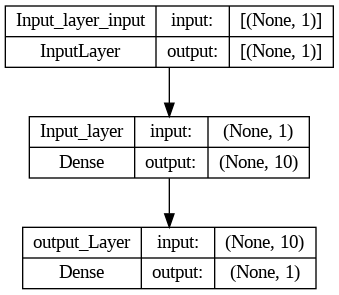

In [23]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True)

In [24]:
model.evaluate(tf.expand_dims(X_train, axis = -1), y_train)

2/2 [==============================] - 1s 21ms/step - loss: 14.5907 - mae: 14.5907


[14.590700149536133, 14.590700149536133]

## Visualizing our model predictions

To visualize predictions, it's good idea of plot then against the ground trught labels.

often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth vs model prediction)


In [25]:
# Make some predictions
y_pred = model.predict(tf.expand_dims(X_test, axis = -1))
y_pred

1/1 [==============================] - 0s 354ms/step


array([[ 76.43696 ],
       [ 81.418785],
       [ 86.40061 ],
       [ 91.38244 ],
       [ 96.364265],
       [101.3461  ],
       [106.32793 ],
       [111.30977 ],
       [116.29159 ],
       [121.273415]], dtype=float32)

In [26]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [27]:
# Let's create a ploting function
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred):
  """
  Plots training data, test data and compares predictions to ground truth
  """

  plt.figure(figsize = (10, 7))
  plt.scatter(train_data, train_labels, c = 'b', label = "Training data")
  plt.scatter(test_data, test_labels, c= 'g', label = "Testing data")
  plt.scatter(test_data, predictions, c = 'r', label = "Predictions")

  plt.legend();

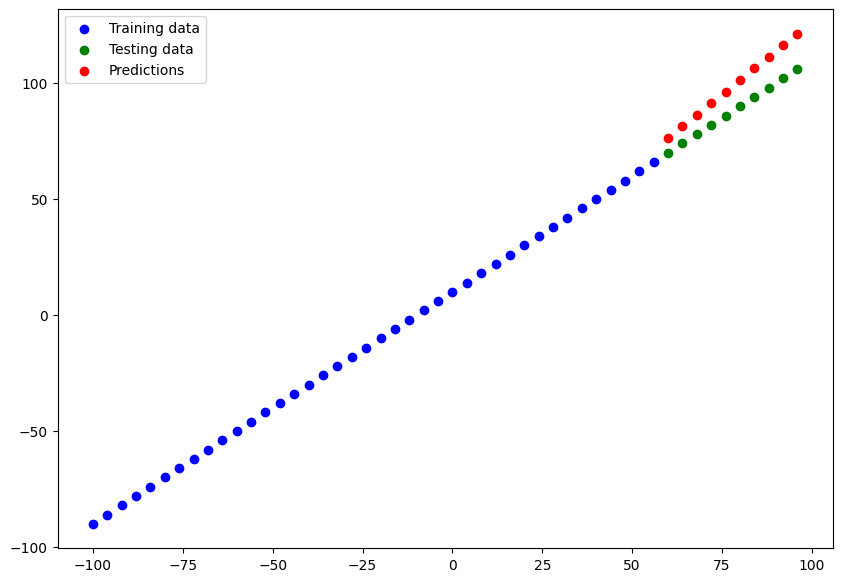

In [28]:
plot_predictions()

## Evaluting our model evalution using the evaluation metrics in regression

Since we're workind on a regression model, two of the main metricsc:

* MAE = mean absolute error
`tf.keras.losses.MAE(), tf.metrics.mean_absolute_error()`
* MSE = mean squared error
`tf.keras.losses.MSE(), tf.metrics.mean_squared_error()`
* Huber - combination of both `mae and mse` (generally less sensitive to outliers than MSE)

In [29]:
model.evaluate(tf.expand_dims(X_test, axis = -1), y_test)


1/1 [==============================] - 0s 66ms/step - loss: 10.8552 - mae: 10.8552


[10.855185508728027, 10.855185508728027]

In [30]:
y_pred = model.predict(tf.expand_dims(X_test, axis  = -1))
y_pred

1/1 [==============================] - 0s 35ms/step


array([[ 76.43696 ],
       [ 81.418785],
       [ 86.40061 ],
       [ 91.38244 ],
       [ 96.364265],
       [101.3461  ],
       [106.32793 ],
       [111.30977 ],
       [116.29159 ],
       [121.273415]], dtype=float32)

In [31]:
#calculate mean absolute error
tf.metrics.mean_absolute_error(y_test, y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([13.337825, 11.032486, 10.      , 10.276487, 11.745707, 14.40766 ,
       18.327927, 23.309769, 28.29159 , 33.273415], dtype=float32)>

In [32]:
y_test.shape, y_pred.shape

(TensorShape([10]), (10, 1))

In [33]:
# we want both to be in same shape
y_pred = tf.squeeze(y_pred)
tf.metrics.mean_absolute_error(y_test, y_pred) # Here is a same answer as in evaluation metrics

<tf.Tensor: shape=(), dtype=float32, numpy=10.8551855>

In [34]:
# Mean Squared erro
tf.metrics.mean_squared_error(y_test, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=125.787964>

In [35]:
tf.keras.losses.huber(y_test, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=10.3551855>

In [36]:
# Create function for mse, mae
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true, y_pred)

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true, y_pred)


## Experiments to improve our model

1. Get more data- get more examples for your model to train on (more opportunities to learan patterns or relationships between features and labels).
2. make your model larger (using more complex model)
3. Train for longer - give your model more chance to find pattern in the data

In [37]:
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [38]:
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

### Model 1

In [49]:
tf.random.set_seed(42)

model_1 = Sequential([
    Dense(1)
])

model_1.compile(loss = mae,
              optimizer = SGD(),
              metrics = ['mae'])

model_1.fit(tf.expand_dims(X_train, axis = -1),y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 13ms/step - loss: 21.2370 - mae: 21.2370
Epoch 2/100
2/2 [==============================] - 0s 11ms/step - loss: 10.2507 - mae: 10.2507
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 10.5880 - mae: 10.5880
Epoch 4/100
2/2 [==============================] - 0s 11ms/step - loss: 9.6057 - mae: 9.6057
Epoch 5/100
2/2 [==============================] - 0s 15ms/step - loss: 10.5221 - mae: 10.5221
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 9.7413 - mae: 9.7413
Epoch 7/100
2/2 [==============================] - 0s 11ms/step - loss: 8.8296 - mae: 8.8296
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 9.0607 - mae: 9.0607
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 19.4110 - mae: 19.4110
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 10.4770 - mae: 10.4770
Epoch 11/100
2/2 [==============================] - 0s 10

1/1 [==============================] - 0s 21ms/step


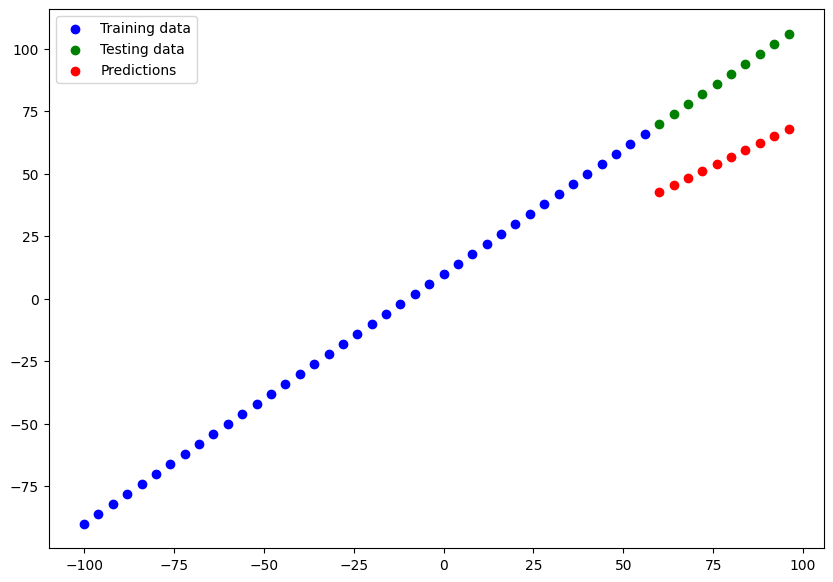

In [52]:
# Make and plot prediction from model1
y_pred_1 = model_1.predict(tf.expand_dims(X_test, axis = -1))
plot_predictions(predictions = y_pred_1)

In [53]:
# Create model_1 evaluation matrix
mae_1  = mae(y_test, tf.squeeze(y_pred_1))
mse_1 = mse(y_test,tf.squeeze(y_pred_1))

In [54]:
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=32.6257>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1076.8745>)

### Model 2

In [57]:
tf.random.set_seed(42)

model_2  = Sequential([
    Dense(10, input_shape = [1], activation = 'relu'),
    Dense(1, activation = 'linear')
])

model_2.compile(loss = mae,
                optimizer = SGD(),
                metrics = ['mse'])

model_2.fit(tf.expand_dims(X_train, axis =-1), y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 1s 11ms/step - loss: 39.6999 - mse: 2252.2417
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 25.8639 - mse: 838.4183
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 22.4100 - mse: 587.4371
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 7.4127 - mse: 76.2412
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 13.6124 - mse: 329.1728
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 8.8571 - mse: 131.7045
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 10.9298 - mse: 181.1578
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 11.4322 - mse: 227.5289
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 28.5417 - mse: 1531.3311
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 14.9976 - mse: 324.6781
Epoch 11/100
2/2 [==============================]

1/1 [==============================] - 0s 36ms/step


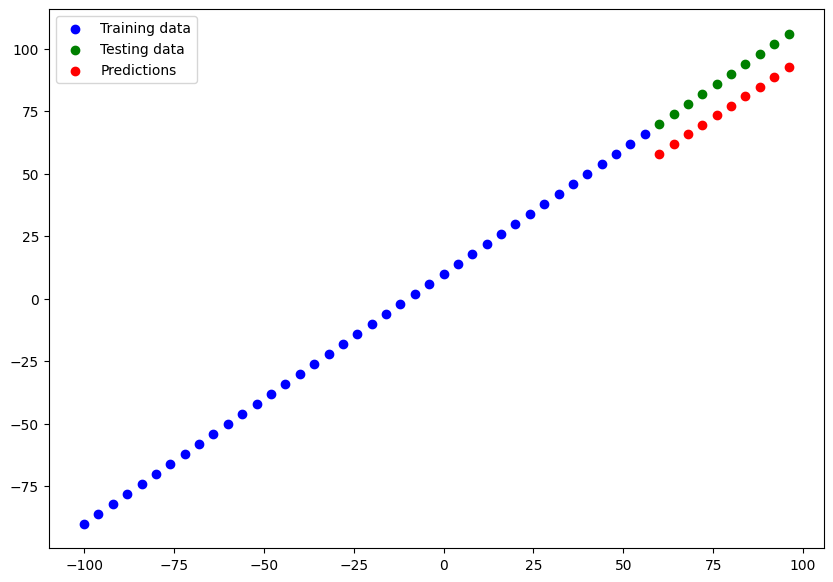

In [60]:
y_pred_2 = model_2.predict(tf.expand_dims(X_test, axis = -1))
plot_predictions(predictions = y_pred_2)

In [62]:
mae_2 = mae(y_test, tf.squeeze(y_pred_2))
mse_2 = mse(y_test, tf.squeeze(y_pred_2))
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=12.701942>,
 <tf.Tensor: shape=(), dtype=float32, numpy=161.58981>)

### Model_3

In [63]:
tf.random.set_seed(42)

model_3 = Sequential([
    Dense(10, activation = 'relu'),
    Dense(1)
])

model_3.compile(loss= mae,
                optimizer = SGD(),
                metrics = ['mse'])

model_3.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 500)

Epoch 1/500
2/2 [==============================] - 1s 16ms/step - loss: 34.6844 - mse: 1976.6715
Epoch 2/500
2/2 [==============================] - 0s 11ms/step - loss: 31.1235 - mse: 1560.4744
Epoch 3/500
2/2 [==============================] - 0s 11ms/step - loss: 38.8008 - mse: 2082.9146
Epoch 4/500
2/2 [==============================] - 0s 10ms/step - loss: 20.7688 - mse: 851.7152
Epoch 5/500
2/2 [==============================] - 0s 10ms/step - loss: 22.0899 - mse: 718.9115
Epoch 6/500
2/2 [==============================] - 0s 12ms/step - loss: 16.6463 - mse: 452.7901
Epoch 7/500
2/2 [==============================] - 0s 11ms/step - loss: 17.3289 - mse: 380.9457
Epoch 8/500
2/2 [==============================] - 0s 11ms/step - loss: 14.4966 - mse: 290.8346
Epoch 9/500
2/2 [==============================] - 0s 12ms/step - loss: 32.0213 - mse: 1941.8301
Epoch 10/500
2/2 [==============================] - 0s 12ms/step - loss: 10.1184 - mse: 163.0251
Epoch 11/500
2/2 [=================

1/1 [==============================] - 0s 189ms/step


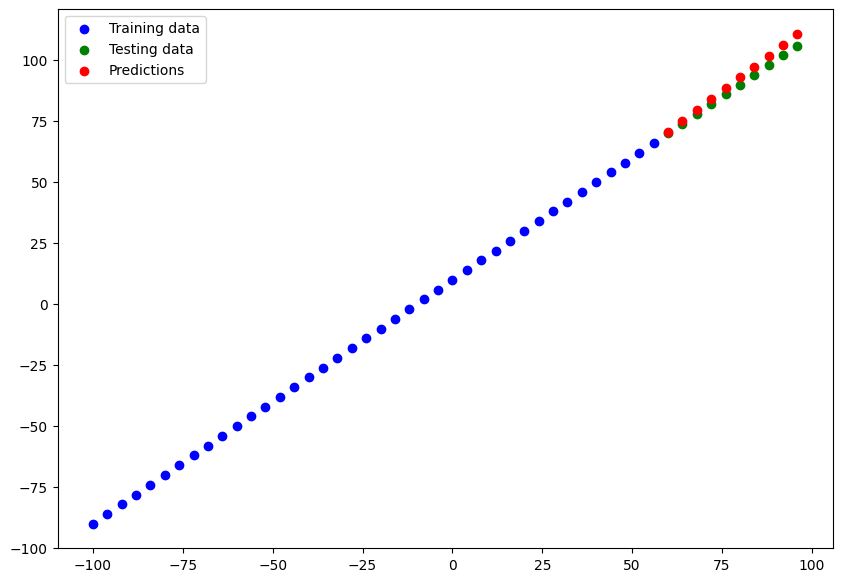

In [64]:
y_pred_3 = model_3.predict(tf.expand_dims(X_test,axis = -1))
plot_predictions(predictions = y_pred_3)

In [65]:
mae_3 = mae(y_test, tf.squeeze(y_pred_3))
mse_3 = mse(y_test, tf.squeeze(y_pred_3))
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=2.7228951>,
 <tf.Tensor: shape=(), dtype=float32, numpy=9.249424>)

## Comparing the results of our experiments

we've run a few experiments, let's compare the results.

In [68]:
# Let's compare our models' results using a pandas datafram
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]
all_results = pd.DataFrame(model_results, columns = ['Model', "mae", 'mse'])
all_results

,Model,mae,mse
0,model_1,32.625702,1076.874512
1,model_2,12.701942,161.589813
2,model_3,2.722895,9.249424


## Tracking your Experiments

one really good habit in machine learing modelling is to track the results of your experiments

and when doing so, it can be teduious if you're running lot of experiments

Luckily, There are tools to help us!

> Task
* Tensorboard - a component of the Tensorflow library to help track modelling experiments(we'll see this one later)
* Weights and Baises - a tool for tracking all of kinds of machine learning experiments (plugs straights into Tensorboard)

## Saving our model

In [70]:
model_3.save("Model_3_epochs_500.keras")

In [72]:
loaded_model_3 = tf.keras.models.load_model("Model_3_epochs_500.keras")

In [73]:
loaded_model_3.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 10)                20        
                                                                 
 dense_24 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [74]:
model_3.save("model_3_saved_model_format")

In [76]:
loaded_model_save_model_format = tf.keras.models.load_model("model_3_saved_model_format")
loaded_model_save_model_format.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 10)                20        
                                                                 
 dense_24 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [78]:
# Download a file from Google Colab
from google.colab import files
files.download("Model_3_epochs_500.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [79]:
# Copy from /content to other in drive
# !cp Model_3_epochs_500.keras <path you want to save in drive>

# A Larger Example

In [81]:
# Import Required libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [82]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [89]:
pd.get_dummies(insurance)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [90]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [91]:
X = insurance_one_hot.drop("charges", axis = 1)
y = insurance_one_hot['charges']

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
len(X_train), len(y_train), len(X_test), len(y_test)

(1070, 1070, 268, 268)

In [98]:
# build a model and train
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = ['mae'])

insurance_model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 8668.1602 - mae: 8668.1602
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7833.4429 - mae: 7833.4429
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7578.6519 - mae: 7578.6519
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7733.3047 - mae: 7733.3047
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7693.2261 - mae: 7693.2261
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7642.4644 - mae: 7642.4644
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7549.0342 - mae: 7549.0342
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7771.8047 - mae: 7771.8047
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7586.8867 - mae: 7586.8867
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7685.4053 - mae: 7685.4053

In [99]:
# check the results of insurance model on test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8352.2236 - mae: 8352.2236


[8352.2236328125, 8352.2236328125]

## Improve our model

In [102]:
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ['mae'])

insurance_model_2.fit(X_train,y_train,epochs = 100)

Epoch 1/100
34/34 [==============================] - 2s 5ms/step - loss: 13272.8320 - mae: 13272.8320
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13098.2705 - mae: 13098.2705
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12731.9678 - mae: 12731.9678
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12018.8408 - mae: 12018.8408
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10847.2256 - mae: 10847.2256
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 9392.8223 - mae: 9392.8223
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8103.9458 - mae: 8103.9458
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7517.1982 - mae: 7517.1982
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7426.0908 - mae: 7426.0908
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7406.7466 - mae:

In [103]:
insurance_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 6ms/step - loss: 4949.1133 - mae: 4949.1133


[4949.11328125, 4949.11328125]

In [106]:
tf.random.set_seed(42)

insurance_model_3 = Sequential([
    Dense(100),
    Dense(10),
    Dense(1)
])

insurance_model_3.compile(loss = mae,
                          optimizer = Adam(),
                          metrics = ['mae'])
history = insurance_model_3.fit(X_train,y_train, epochs = 200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13291.2617 - mae: 13291.2617
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13124.3428 - mae: 13124.3428
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 12785.8242 - mae: 12785.8242
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12125.8252 - mae: 12125.8252
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 11010.5195 - mae: 11010.5195
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 9559.6055 - mae: 9559.6055
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8208.1318 - mae: 8208.1318
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7547.1074 - mae: 7547.1074
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7436.4414 - mae: 7436.4414
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 7414.9858 - mae:

In [107]:
insurance_model_3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3492.9160 - mae: 3492.9160


[3492.916015625, 3492.916015625]

Text(0.5, 0, 'epochs')

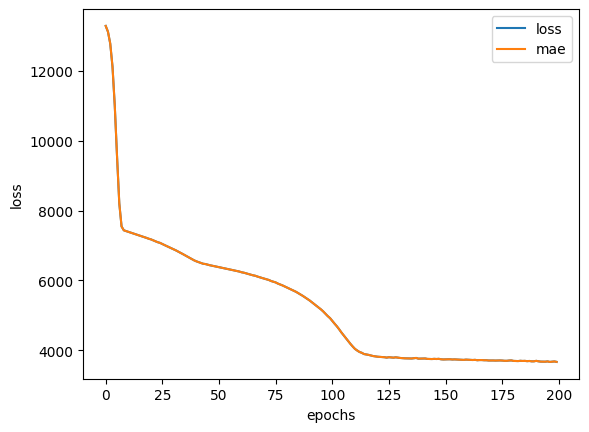

In [108]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

**How long should you train**
> `EarlyStopping` callback could help with this question

In [109]:
EarlyStopping = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 3)
tf.random.set_seed(42)

insurance_model_3 = Sequential([
    Dense(100),
    Dense(10),
    Dense(1)
])

insurance_model_3.compile(loss = mae,
                          optimizer = Adam(),
                          metrics = ['mae'])
history = insurance_model_3.fit(X_train,y_train, epochs = 500, callbacks = [EarlyStopping])

Epoch 1/500
34/34 [==============================] - 1s 4ms/step - loss: 13315.8809 - mae: 13315.8809
Epoch 2/500
34/34 [==============================] - 0s 3ms/step - loss: 13193.0879 - mae: 13193.0879
Epoch 3/500
34/34 [==============================] - 0s 3ms/step - loss: 12929.9111 - mae: 12929.9111
Epoch 4/500
34/34 [==============================] - 0s 4ms/step - loss: 12379.4902 - mae: 12379.4902
Epoch 5/500
34/34 [==============================] - 0s 5ms/step - loss: 11383.1553 - mae: 11383.1553
Epoch 6/500
34/34 [==============================] - 0s 7ms/step - loss: 9961.2246 - mae: 9961.2246
Epoch 7/500
34/34 [==============================] - 0s 8ms/step - loss: 8489.7119 - mae: 8489.7119
Epoch 8/500
34/34 [==============================] - 0s 6ms/step - loss: 7609.4819 - mae: 7609.4819
Epoch 9/500
34/34 [==============================] - 0s 6ms/step - loss: 7424.6313 - mae: 7424.6313
Epoch 10/500
34/34 [==============================] - 0s 6ms/step - loss: 7399.6699 - mae:

### Our model automatically stopped at 147 epochs out of 500 due to Early stopping which checks loss and if it stops decreasing it will stop the model to train

Text(0, 0.5, 'loss')

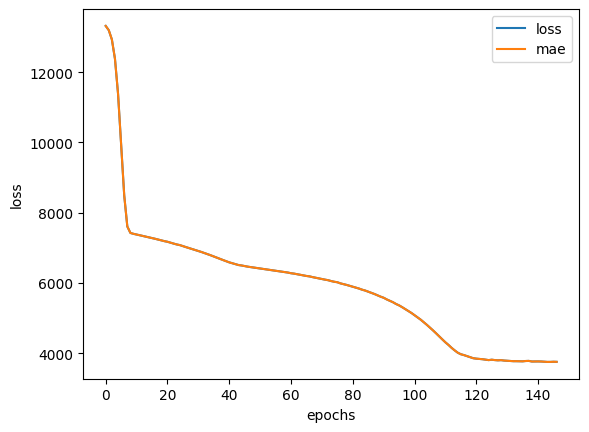

In [110]:
pd.DataFrame(history.history).plot();
plt.xlabel('epochs')
plt.ylabel("loss")

## Preprocessing data

* Normalization - `minmaxscaling`
  * use as default scaler with NN
  * range [0,1]
* Standardization - `StandarScaler`
  * Transform features to have close to normal distribuition
  * This reduce the effect of outliers

In [112]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [130]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

# Create a colum transformer
Ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']),
    (OneHotEncoder(handle_unknown = 'ignore'), ['sex', 'smoker', 'region'])
)

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
X = insurance.drop('charges', axis= 1)
y = insurance['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)
Ct.fit(X_train)
X_train_normal = Ct.transform(X_train)
X_test_normal = Ct.transform(X_test)

In [133]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [134]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [135]:
# Build a neural network model to fit on our normalized data
tf.random.set_seed(42)

insurance_model_3 = Sequential([
    Dense(100),
    Dense(10),
    Dense(1)
])

insurance_model_3.compile(loss = mae,
                          optimizer = Adam(),
                          metrics = ['mae'])

EarlyStopping = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 3)
insurance_model_3.fit(X_train_normal, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 2s 4ms/step - loss: 13343.7549 - mae: 13343.7549
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 13335.8545 - mae: 13335.8545
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 13315.6562 - mae: 13315.6562
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 13273.2139 - mae: 13273.2139
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 13197.7285 - mae: 13197.7285
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 13078.3096 - mae: 13078.3096
Epoch 7/100
34/34 [==============================] - 0s 6ms/step - loss: 12904.6963 - mae: 12904.6963
Epoch 8/100
34/34 [==============================] - 0s 5ms/step - loss: 12666.7080 - mae: 12666.7080
Epoch 9/100
34/34 [==============================] - 0s 5ms/step - loss: 12354.0381 - mae: 12354.0381
Epoch 10/100
34/34 [==============================] - 0s 5ms/step - loss: 11961.22

In [138]:
insurance_model_3.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3440.1819 - mae: 3440.1819


[3440.181884765625, 3440.181884765625]